# Notebook zur adaptiven Quadratur

**Abgabe in den Programmiertutorien am 28. und 29. November 2024. Falls Sie Unterstützung bei der Bearbeitung der Programmieraufgabe brauchen, wenden Sie sich frühzeitig an Ihren Tutor oder melden Sie sich im Forum.**

Benötigte Module für dieses Notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Programmieraufgabe 2 (Adaptive Quadratur)

Wir betrachten wieder eine einfache Beispielfunktion $f$ auf einem Intervall $[a,b]$, auf welche wir eine __adaptive__ Simpsonsumme mit eingebetteter Trapezregel anwenden wollen.

Ziel ist es, eine Approximation $Q(f)$ des Integrals
$$ I(f) = \int_a^b f(x)\mathrm{d} x $$
zu berechnen, sodass 
$$|I(f) - Q(f)| \le \text{tol} \cdot \int_a^b |f(x)|\mathrm{d} x $$
für eine gegebene Toleranz $\text{tol} > 0$ gilt.

**(a) Implementieren Sie eine Prozedur mit dem Namen `quad_single_inveral`, die die Simpson- und Trapezregel zu einer Funktion $f$ und die Simpsonregel zu $\vert f\vert$ für das Intervall $[a,b]$ berechnet und alle drei Ergebnisse ausgibt. Testen Sie Ihre Implementierung mit der Funktion 
$$
f(x)=x^2,
$$
$a=0$ und $b=1$.**

**LSG**:
Zu a) Die folgende Funktion berechnet auf einem Intervall $[a,b]$ die Simpson- und Trapezregel zu $f$ und die Simpsonregel zu $|f|$. Diese werden wir später nicht für das Intervall $[a,b]$ selbst, sondern für die Teilintervalle verwenden. Wichtig dabei ist: Die Berechnung der Trapezregel und der Simpsonregel für $|f|$ erfordert keine weitere $f$-Auswertung.

In [2]:
def quad_single_interval(f, a, b):
    m = (a+b)/2
    fa,     fm,     fb     =       f(a),       f(m),       f(b)
    fa_abs, fm_abs, fb_abs = np.abs(fa), np.abs(fm), np.abs(fb)
    
    # Rückgabe in der Form (Simpson für f, Simpson für |f|, Trapez für f)
    return (b-a)/6*(fa + 4*fm + fb), (b-a)/6*(fa_abs + 4*fm_abs + fb_abs), (b-a)/2*(fa + fb)

In [3]:
a = 0
b = 1
def g(x):
    return x**2

In [4]:
# Testen der quad_single_interval Funktion
res_simpson, res_abs, res_trapez = quad_single_interval(g, 0, 1)
print(res_simpson, res_abs, res_trapez)

0.3333333333333333 0.3333333333333333 0.5


Für den Rest der Programmieraufgabe betrachten wir die Funktion
$$f_\mu(x)=\frac{\mu}{\mu^2+x^2}$$
für verschiedene Parameter $\mu\in\mathbb{R}\setminus \{0\}$: 

In [5]:
def f(x, mu):
    return mu/(mu**2+x**2)

In [6]:
print(f(1,2))
print(f(1,3))

0.4
0.3


Für einen festen Wert von $\mu$ erlaubt die Python-Funktion `lambda`, die Funktion $f_\mu$ als Fuktion nur in der Variable $x$ zu interpretieren und auszuwerten:

In [7]:
f_mu = lambda x: f(x, mu)

mu = 2
print(f_mu(1))
mu = 3
print(f_mu(1))

0.4
0.3


**b) Benutzen Sie die Prozedur `quad_single_interval` aus a) und implementieren Sie eine Prozedur `quad_42` zur Berechnung des adaptiven Integrals einer Funktion $f$ mit der Simpsonregel mit eingebetteter Trapezregel auf dem Intervall $[a,b]$. Benutzen Sie den Fehlerschätzer $\varepsilon_n\approx \frac{1}{h_n}\delta^2_n$ mit der adaptiven Wahl der Zerlegung des Intervalls und den Abbruchkriterien aus Kapitel 1.8 im Skript. Übergeben Sie die kleinste zulässige Intervallbreite $h_{\text{crit}}$ und die Toleranz $\text{tol}$ als Parameter der Prozedur. Am Ende soll die Prozedur `quad_42` das Gitter (Stützstellen) nach der adaptiven Zerlegung und die adaptive Simpsonsumme ausgeben.**

_Hinweis:_ Definieren Sie in Ihrer Prozedur einen Vektor `mesh`, der alle Stützstellen enthält, sowie zwei Vektoren `res` und `error`, welche die Approximation der Simpsonregel für $f$ sowie die geschätzten Fehler auf den einzelnen Teilintervallen enthalten. Updaten Sie alle drei Vektoren bei Hinzunahme weiterer Daten. Die Befehle `np.argmax` und `np.hstack` könnten hilfreich sein.

**Testen Sie die Prozedur mit $f_1$, $a=-2$, $b=2$, $\text{tol}=10^{-5}$ und $h_{\text{crit}}=10^{-2}$.** 

_Hinweis:_ Es gilt $\int_{-2}^2 f_1(x) \, \mathrm{d} x \approx 2.2143$.

**LSG**: 
Zu b) In der Funktion `quad_42` wird adaptiv der Wert des Integrals berechnet. Dabei muss auf Teilintervallen der Form $[x_{n-1},x_{n}]$ mit $h_n=x_n-x_{n-1}$ der Fehler der _genaueren_ Simpsons-Quadraturformel
$$ \varepsilon_n = \left| \int_{x_{n-1}}^{x_{n}} f(x)\mathrm{d} x - h_n\sum_{k=1}^3 b_k f(x_{n-1}+c_kh_n)\right|$$ 
__geschätzt__ werden. Dies kann man heuristisch wie folgt tun:
Da die Simpsonregel Ordnung $p=4$ hat, verhält sich der lokale Fehler $\varepsilon_n$
wie $Ch_n^5$. Die Trapezregel hat Ordnung $\hat{p}=2$ und der lokale Fehler 
$$ \hat{\varepsilon}_n= \left| \int_{x_{n-1}}^{x_{n}} f(x)\mathrm{d} x - h_n\sum_{k=1}^3 \hat{b}_k f(x_{n-1}+c_kh_n)\right|$$ 
(mit $\hat{b}_2=0$) verhält sich daher wie $\hat{C}h_n^3$. Wegen $\tfrac{1}{h_n}(h_n^3)^2 = h_n^5$ ist es naheliegend, den Fehler des genaueren Verfahrens als Quadrat des Fehlers des schlechteren Verfahrens, geteilt durch die Gitterweite $h_n$, zu schätzen: $\varepsilon_n  \approx \tfrac{1}{h_n} \hat{\varepsilon}_n^2$. Dabei wird $\hat{\varepsilon}_n$ approximativ über
$$ \hat{\varepsilon}_n \approx \left| h_n\sum_{k=1}^3 b_k f(x_{n-1}+c_kh_n) - h_n\sum_{k=1}^3 \hat{b}_k f(x_{n-1}+c_kh_n)\right| :=\delta_n$$ 
berechnet (dabei wurde das Integral durch die Simpsonregel ersetzt). Ist der Fehler zu groß, so halbiert man das Teilintervall und rechnet auf den neu entstandenen Teilintervallen $[x_{n-1},x_{n-1}+\tfrac{h_n}{2}]$ und $[x_{n-1} + \tfrac{h_n}{2},x_{n}]$ mit Hilfe der Funktion `quad_single_interval()` die Werte für die Simpson- und Trapezregel und den Wert der Simpsonregel für $|f|$ aus, um dann wiederum die Fehler auf den Teilintervallen zu bestimmen bzw. das Stoppkriterium prüfen zu können.

_Hinweis:_ Obwohl dieses heuristische Vorgehen zunächst etwas willkürlich wirkt, liefert dies in der Praxis oft gute Ergebnisse. Eine Garantie, dass dieses Verfahren funktioniert (oder ein Kriterium dafür, wann es funktioniert), gibt es nicht.

In [8]:
def quad_42(f, a, b, tol, h_crit):
    mesh = np.array([a, b])
    res, res_abs = np.array([0.0]), np.array([0.0])
    res[0], res_abs[0], res_trapez = quad_single_interval(f, a, b)
    
    # Der Fehler wird geschätzt, als Quadrat des Fehlers der Trapezregel geteilt durch die Intervallbreite
    error = 1/(b-a)*np.abs((res - res_trapez)**2)
    
    while np.sum(error) > tol * np.sum(res_abs):
        # Bestimmung des Indexes des Teilintervalls, auf welchem der Fehler am größten ist.
        n = np.argmax(error)
        
        # Berechnung des Mittelpunkts des n-ten Teilintervalls
        m = (mesh[n] + mesh[n+1])/2
        a1, b1 = mesh[n], m
        a2, b2 = m, mesh[n+1]
        
        # Berechnung der Intervallgrößen für das Abbruchkriterum
        h_n = np.abs(a1-b1)
        if h_n < h_crit:
            print("Termination: Smallest interval length is ",h_n," and thus below the criteria ",h_crit)
            break
        
        # Berechnung aller Größen auf den beiden Teilintervallen, die durch Halbierung des n-ten Teilintervalls entstehen 
        res1, res1_abs, res1_trapez = quad_single_interval(f, a1, b1)
        res2, res2_abs, res2_trapez = quad_single_interval(f, a2, b2)
        #b1, a1, b2, a2 = b, a, b, a
        err1 =  1/(b1-a1)*np.abs((res1 - res1_trapez)**2)
        err2 =  1/(b2-a2)*np.abs((res2 - res2_trapez)**2)
        
        # Einfügen des neuen Gitterpunkts und Ersetzung der Werte im n-ten Intervall durch die beiden neuen Werte        
        mesh    = np.hstack((mesh[:n+1], m, mesh[n+1:]))  
        res     = np.hstack((    res[:n], res1,     res2,         res[n+1:]))
        error   = np.hstack((  error[:n], err1,     err2,       error[n+1:]))

    return mesh, np.sum(res)

In [9]:
mu = 1
a = -2
b = 2
mesh,res = quad_42(f_mu, a, b, 1e-5, 0.1)
print('Verwendetes Gitter:')
print(mesh)
print('Finale Integral-Approximation:')
print(res)

Verwendetes Gitter:
[-2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25  -0.125  0.
  0.125  0.25   0.5    0.75   1.     1.25   1.5    1.75   2.   ]
Finale Integral-Approximation:
2.214285060751423


Die Prozedur liefert eine Integral-Approximation mit dem Wert $2.214285$ und die analytische Lösung des Integrals beträgt ungefähr $2.2143$ und somit scheint die Prozedur zu funktionieren.

**c) Geben Sie für jedes $\mu\in\{0.01;0.1;1\}$ den relativen Fehler 
$$ \frac{ |I(f)-Q(f)| }{ \int_a^b |f(x)| \, \mathrm{d} x } $$
der adaptiven Simpsonregel mit eingebetteter Trapezregel mit $\text{tol}=10^{-4}$ und $h_{\text{crit}}=10^{-2}$ angewandt auf die Funktionen $f_\mu$ auf dem Intervall $(a,b)=(-2,2)$ an. Erklären Sie die Ergebnisse. Wie verändert sich der Fehler für $\mu=1$ und verschiedene Toleranzen $\text{tol}\in\{10^{-1};10^{-4};10^{-8};10^{-12}\}$?** 

_Hinweis:_ Verwenden Sie für die Fehlerberechnung die Stammfunktion von $f_\mu(x)$: 
$$F_\mu(x)=\arctan\left(\frac{x}{\mu}\right).$$

In [10]:
tol = 1e-4
h_crit = 1e-2
a = -2
b = 2

def exact_int(mu, a, b):
    return np.arctan(b/mu)-np.arctan(a/mu)

print('Fehler in Abhängigkeit von mu')
MU = [0.01,0.1,1]

for mu in MU:
    f_mu = lambda x: f(x, mu)
    mesh, result = quad_42(f_mu, a, b, tol, h_crit)
    print("Relativer Fehler für mu=%.2f" %mu, ": ", abs(result-exact_int(mu, a, b))/exact_int(mu, a, b)  )

print('\nFehler in Abhängigkeit von tol')
TOL = [1e-1,1e-4,1e-8,1e-12]
mu = 1
f_mu = lambda x: f(x, mu)

for tol in TOL:
    mesh, result = quad_42(f_mu, a, b, tol, h_crit)
    print("Relativer Fehler für tol=%.0e" %tol, ": ", abs(result-exact_int(mu, a, b))/exact_int(mu, a, b)  )


Fehler in Abhängigkeit von mu
Termination: Smallest interval length is  0.0078125  and thus below the criteria  0.01
Relativer Fehler für mu=0.01 :  0.009888745923397748
Relativer Fehler für mu=0.10 :  0.00038855197848690316
Relativer Fehler für mu=1.00 :  7.354525518520709e-05

Fehler in Abhängigkeit von tol
Relativer Fehler für tol=1e-01 :  0.03656423972389289
Relativer Fehler für tol=1e-04 :  7.354525518520709e-05
Relativer Fehler für tol=1e-08 :  1.0128968740171513e-07
Termination: Smallest interval length is  0.0078125  and thus below the criteria  0.01
Relativer Fehler für tol=1e-12 :  3.524186387238172e-09


Für $\mu = 0.01$ bricht die Prozedur aufgrund des kleinsten Intervalls Kriterium ab. Daher ist der relative Fehler im Vergleich zu den anderen Werten von $\mu$ relativ groß. Für die Werte $\mu \in \{0.1;1\}$ ist der relative Fehler kleiner als die festgelegte Toleranz von $10^{-5}$. Dies führt zu der Vermutung, dass der Fehlerschätzer für diese Beispiele gut funktioniert.

Für festes $\mu=1$ ist der relative Fehler für die Toleranzen $\text{tol}\in \{10^{-2};10^{-5}\}$ tatsächlich kleiner als die vorgegebene Toleranz $\text{tol}$. Somit vermuten wir, dass der Fehler gut geschätzt wird. Für $\text{tol}=10^{-8}$ ist der relativ Fehler größer als $\text{tol}$. Hier wurde der Fehler in der Prozedur `quad_42` zu optimistisch geschätzt. Auch für $\text{tol}=10^{-12}$ ist der Fehler größer als die vorgegebene Toleranz, hier liegt das allerdings an dem frühzeitigen Abbbruch nach Erreichen der Mindestintervallbreite.

**d) Wir wählen nun $\text{tol}=10^{-4}$, $h_{\text{crit}}=10^{-2}$ und $\mu = 0.1$. Zeichnen sie die Funktion $f_\mu$ im Intervall $[-2,2]$ und visualisieren Sie die von der Prozedur `quad_42` verwendeten Stützstellen auf dem Funktionsgraphen.**

**OPTIONAL: e) Visualisieren Sie zusätzlich zur Aufgabe d) die im adaptiven Verfahren verwendeten Teilintervallbreiten $h_n$  über dem Intervall $[-2,2]$.** 

Termination: Smallest interval length is  0.0078125  and thus below the criteria  0.01


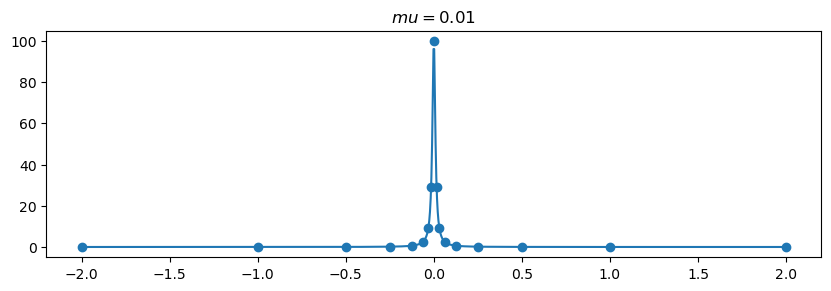

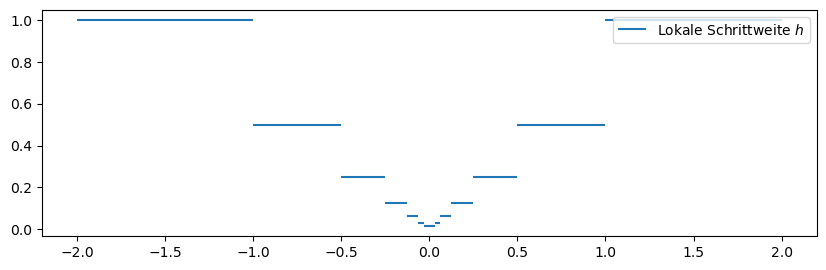

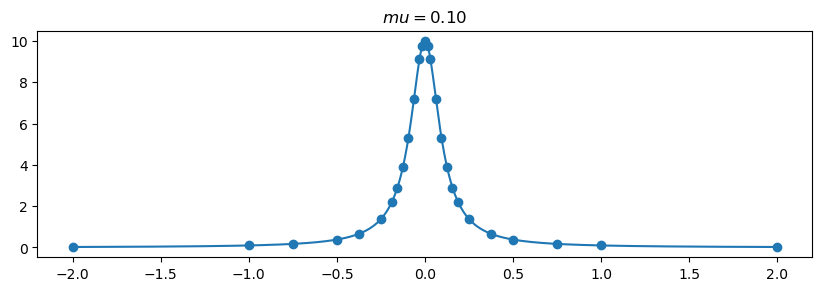

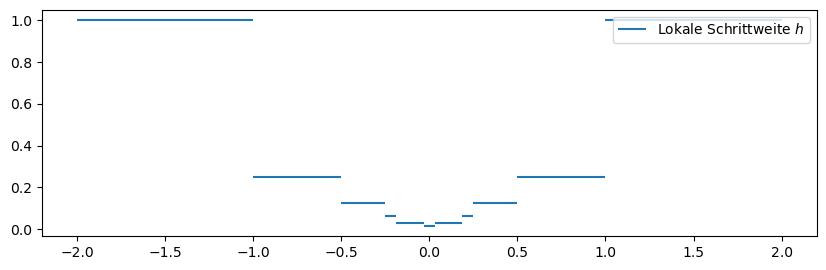

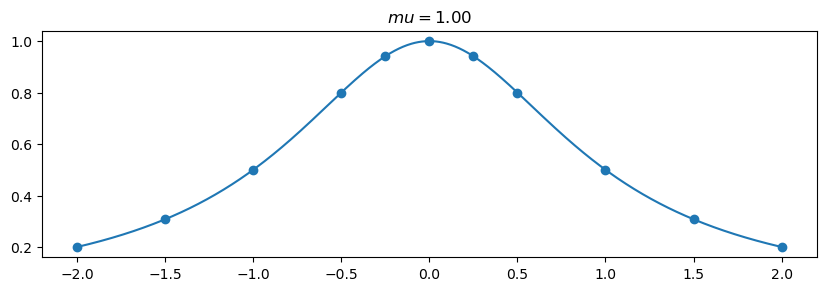

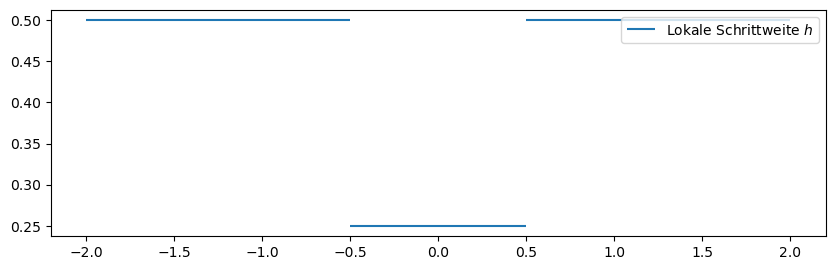

In [11]:
TOL = 1e-4 
h_crit = 1e-2
MU = [0.01,0.1,1]

a = -2
b = 2
X = np.linspace(a, b, 1000)

count = 1
for mu in MU:
    f_mu = lambda x: f(x, mu)

    mesh, result = quad_42(f_mu, a, b, TOL, h_crit)

    plt.figure(figsize=(10,10))   
    plt.subplot(3,1,count)
    plt.plot(X, f_mu(X)) 
    plt.scatter(mesh, f_mu(mesh))
    plt.title('$mu= %.2f $' %mu) 
    # nicht notwendig, aber schön zu sehen ;)
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,count)
    plt.hlines(mesh[1:] - mesh[:-1], mesh[:-1], mesh[1:])
    plt.legend(["Lokale Schrittweite $h$"])
    
    count = count + 1
       
plt.show()